In [2]:
!pip install kaggle
!pip install pandas
!pip install graphviz
!pip3 install pydotplus
!pip install webcolors
!pip install colour
!pip install prettytable
import os
import zipfile
import kaggle

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#{"username":"anguis1","key":"8e5aa869bd2b736636371bd2e59902b3"}

os.environ['KAGGLE_USERNAME'] = 'anguis1'
os.environ['KAGGLE_KEY'] = '8e5aa869bd2b736636371bd2e59902b3'

#Nom du dataset
dataset = "vishalsubbiah/pokemon-images-and-types"

#Téléchargement du Dataset
kaggle.api.dataset_download_files(dataset)

with zipfile.ZipFile('pokemon-images-and-types.zip', 'r') as zip_ref:
    zip_ref.extractall('pokemon')

In [4]:
import urllib.request
import json
import pandas as pd

#On charge le fichier csv
df = pd.read_csv('./pokemon/pokemon.csv')

#On crée un dictionnaire associant le nom du pokemon à son image
pokemon_images = {}
for filename in os.listdir("./pokemon/images/images"):
    if filename.endswith(".png"):
        name = filename.split(".")[0]
        pokemon_images[name] = os.path.join("pokemon/images/images", filename)

# Ajouter une colonne "image" au dataframe
df["image"] = df["Name"].apply(lambda x: pokemon_images.get(x, None))

# Supprimer les lignes sans image
df = df.dropna(subset=["image"])

# Afficher le dataframe
print(df.head())

         Name  Type1   Type2                                 image
0   bulbasaur  Grass  Poison   pokemon/images/images/bulbasaur.png
1     ivysaur  Grass  Poison     pokemon/images/images/ivysaur.png
2    venusaur  Grass  Poison    pokemon/images/images/venusaur.png
3  charmander   Fire     NaN  pokemon/images/images/charmander.png
4  charmeleon   Fire     NaN  pokemon/images/images/charmeleon.png


In [5]:
import numpy as np
from sklearn.cluster import KMeans

def get_dominant_colors(image_path, n_colors):
    
    #Définir explicitement n_init pour éviter l'avertissement de version future
    n_init = 'auto'
    
    # Charger l'image et la convertir en une matrice numpy
    img = Image.open(image_path)
    img = np.array(img)

    # Obtenir un tableau de pixels en deux dimensions
    pixels = img.reshape(-1, 3)
    #-1 car l'argument s'adapte à la taille de l'image et 3 pour le RGB
    
    # Créer un objet de clustering
    kmeans = KMeans(n_clusters=n_colors, n_init=n_init)

    # Entraîner le modèle
    kmeans.fit(pixels)

    # Récupérer les couleurs dominantes
    dominant_colors = kmeans.cluster_centers_

    # Convertir les couleurs en entiers et les ajouter à une liste
    dominant_colors = [tuple(map(int, color)) for color in dominant_colors]
    
    return dominant_colors

In [6]:
def rgb_to_hex(rgb):
    #Convertir les valeurs RGB en valeurs hexadécimales
    hex_color = '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex_color

In [7]:
def rgb_to_hex_list(image_path, n_colors):
    
    #Fonction permettant de convertir une couleur rgb (liste de 3 valeurs) en une valeur hexadécimale
    
    dominant_colors = get_dominant_colors(image_path, n_colors)
    
    #Convertir la liste de couleurs RGB en liste de couleurs hexadécimales
    hex_list = [rgb_to_hex(rgb) for rgb in dominant_colors]
    return hex_list

In [8]:
import webcolors
from colour import Color

def hex_to_color_name(requested_color):
    # Convertir la couleur en un objet Color
    try:
        requested_color = Color(requested_color)
    except:
        raise ValueError(f"La valeur hexadécimale '{requested_color}' n'est pas valide.")
    
    # Trouver la couleur la plus proche dans la liste des noms de couleurs prédéfinis
    closest_color = None
    min_colors = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        try:
            # Convertir la couleur prédéfinie en un objet Color
            color = Color(key)
            
            # Calculer la distance entre les deux couleurs en utilisant la différence Euclidienne
            r_distance = (requested_color.red - color.red) ** 2
            g_distance = (requested_color.green - color.green) ** 2
            b_distance = (requested_color.blue - color.blue) ** 2
            distance = r_distance + g_distance + b_distance
            
            # Garder la distance minimale pour chaque couleur prédéfinie
            if distance not in min_colors:
                min_colors[distance] = name
        except ValueError:
            # Ignorer les couleurs prédéfinies qui ne peuvent pas être converties en objet Color
            pass
    
    # Retourner la couleur prédéfinie ayant la distance minimale à la couleur demandée
    closest_color = min_colors[min(min_colors.keys())]
    return closest_color


In [9]:
# import random
import random

def satisfied_or_not():
    
    #Fonction pour générer un avis aléatoire (positif ou négatif) de l'utilisateur pour pouvoir effectuer des tests
    
    return random.choice(['Yes', 'No'])

In [10]:
import os
import csv
import json
from PIL import Image

# Chemin du dossier contenant les images
folder_path = './pokemon/images/images'

# Liste des extensions de fichier que nous voulons inclure dans l'analyse
extensions = ['.jpg', '.jpeg', '.png']

# Initialisation de la liste pour stocker les informations de chaque image
list_images_info = []

# Ouverture du fichier CSV
with open('./pokemon/pokemon.csv') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader) # Ignorer la première ligne (en-tête)
    for row in csv_reader:
        # Récupère les informations du CSV
        pokemon_name = row[0]
        type1 = row[1]
        try :
            type2 = row[2]
        except Exception as e:
            type2 = 'None'
            continue

        filename = row[0]+'.png'
    
        try:
            # Vérifie si le fichier est une image avec une extension spécifiée
            if any(filename.lower().endswith(ext) for ext in extensions):
                # Chemin complet de l'image
                filepath = os.path.join(folder_path, filename)
                # Ouvre l'image avec PIL
                with Image.open(filepath) as img:
                    
                    #On calcule les kmeans de l'image
                    kmeans_hex_list = rgb_to_hex_list(filepath, 5)
                    
                    # Stocke les informations dans un dictionnaire
                    images_info = {'filename': filename,
                                   'pokemon_name': pokemon_name,
                                   'type1': type1,
                                   'type2': type2,
                                   'size': str(os.path.getsize(filepath)),
                                   'k-means_region_one' : hex_to_color_name(kmeans_hex_list[1]),
                                   'k-means_region_two' : hex_to_color_name(kmeans_hex_list[2]),
                                   'k-means_region_three' : hex_to_color_name(kmeans_hex_list[3]),
                                   'k-means_region_four' : hex_to_color_name(kmeans_hex_list[4]),
                                   'favorite_utilisateur1': satisfied_or_not(),
                                   'favorite_utilisateur2': satisfied_or_not(),
                                   'favorite_utilisateur3': satisfied_or_not(),
                                   'favorite_utilisateur4': satisfied_or_not()}
                    # Ajoute le dictionnaire à la liste
                    list_images_info.append(images_info)
        except Exception as e:
            filename = row[0]+'.jpg' #Si le fichier n'existe pas en .png, on teste de le trouver en .jpg
    
            try:
                # Vérifie si le fichier est une image avec une extension spécifiée
                if any(filename.lower().endswith(ext) for ext in extensions):
                    # Chemin complet de l'image
                    filepath = os.path.join(folder_path, filename)
                    # Ouvre l'image avec PIL
                    with Image.open(filepath) as img:

                        #On calcule les kmeans de l'image
                        kmeans_hex_list = rgb_to_hex_list(filepath, 5)

                        # Stocke les informations dans un dictionnaire
                        images_info = {'filename': filename,
                                       'pokemon_name': pokemon_name,
                                       'type1': type1,
                                       'type2': type2,
                                       'size': str(os.path.getsize(filepath)),
                                       'k-means_region_one' : hex_to_color_name(kmeans_hex_list[1]),
                                       'k-means_region_two' : hex_to_color_name(kmeans_hex_list[2]),
                                       'k-means_region_three' : hex_to_color_name(kmeans_hex_list[3]),
                                       'k-means_region_four' : hex_to_color_name(kmeans_hex_list[4]),
                                       'favorite_utilisateur1': satisfied_or_not(),
                                       'favorite_utilisateur2': satisfied_or_not(),
                                       'favorite_utilisateur3': satisfied_or_not(),
                                       'favorite_utilisateur4': satisfied_or_not()}
                        # Ajoute le dictionnaire à la liste
                        list_images_info.append(images_info)
            except Exception as e:
                print(f"Erreur lors de l'extraction des informations de {row[0]}: {e}")
                continue

# Écriture du résultat dans un fichier JSON
with open('images_info.json', 'w') as json_file:
    json.dump(list_images_info, json_file)

            filename pokemon_name     type1   type2  size k-means_region_one  \
0      bulbasaur.png    bulbasaur     Grass  Poison  2198             silver   
1        ivysaur.png      ivysaur     Grass  Poison  3188         powderblue   
2       venusaur.png     venusaur     Grass  Poison  5770             violet   
3      charizard.png    charizard      Fire  Flying  4980       antiquewhite   
4     butterfree.png   butterfree       Bug  Flying  3982         whitesmoke   
..               ...          ...       ...     ...   ...                ...   
400     magearna.jpg     magearna     Steel   Fairy  1952            dimgray   
401    marshadow.jpg    marshadow  Fighting   Ghost  1277               gray   
402    naganadel.jpg    naganadel    Poison  Dragon  2798          slateblue   
403    stakataka.jpg    stakataka      Rock   Steel  2696               gray   
404  blacephalon.jpg  blacephalon      Fire   Ghost  1971               gray   

    k-means_region_two k-means_region_t

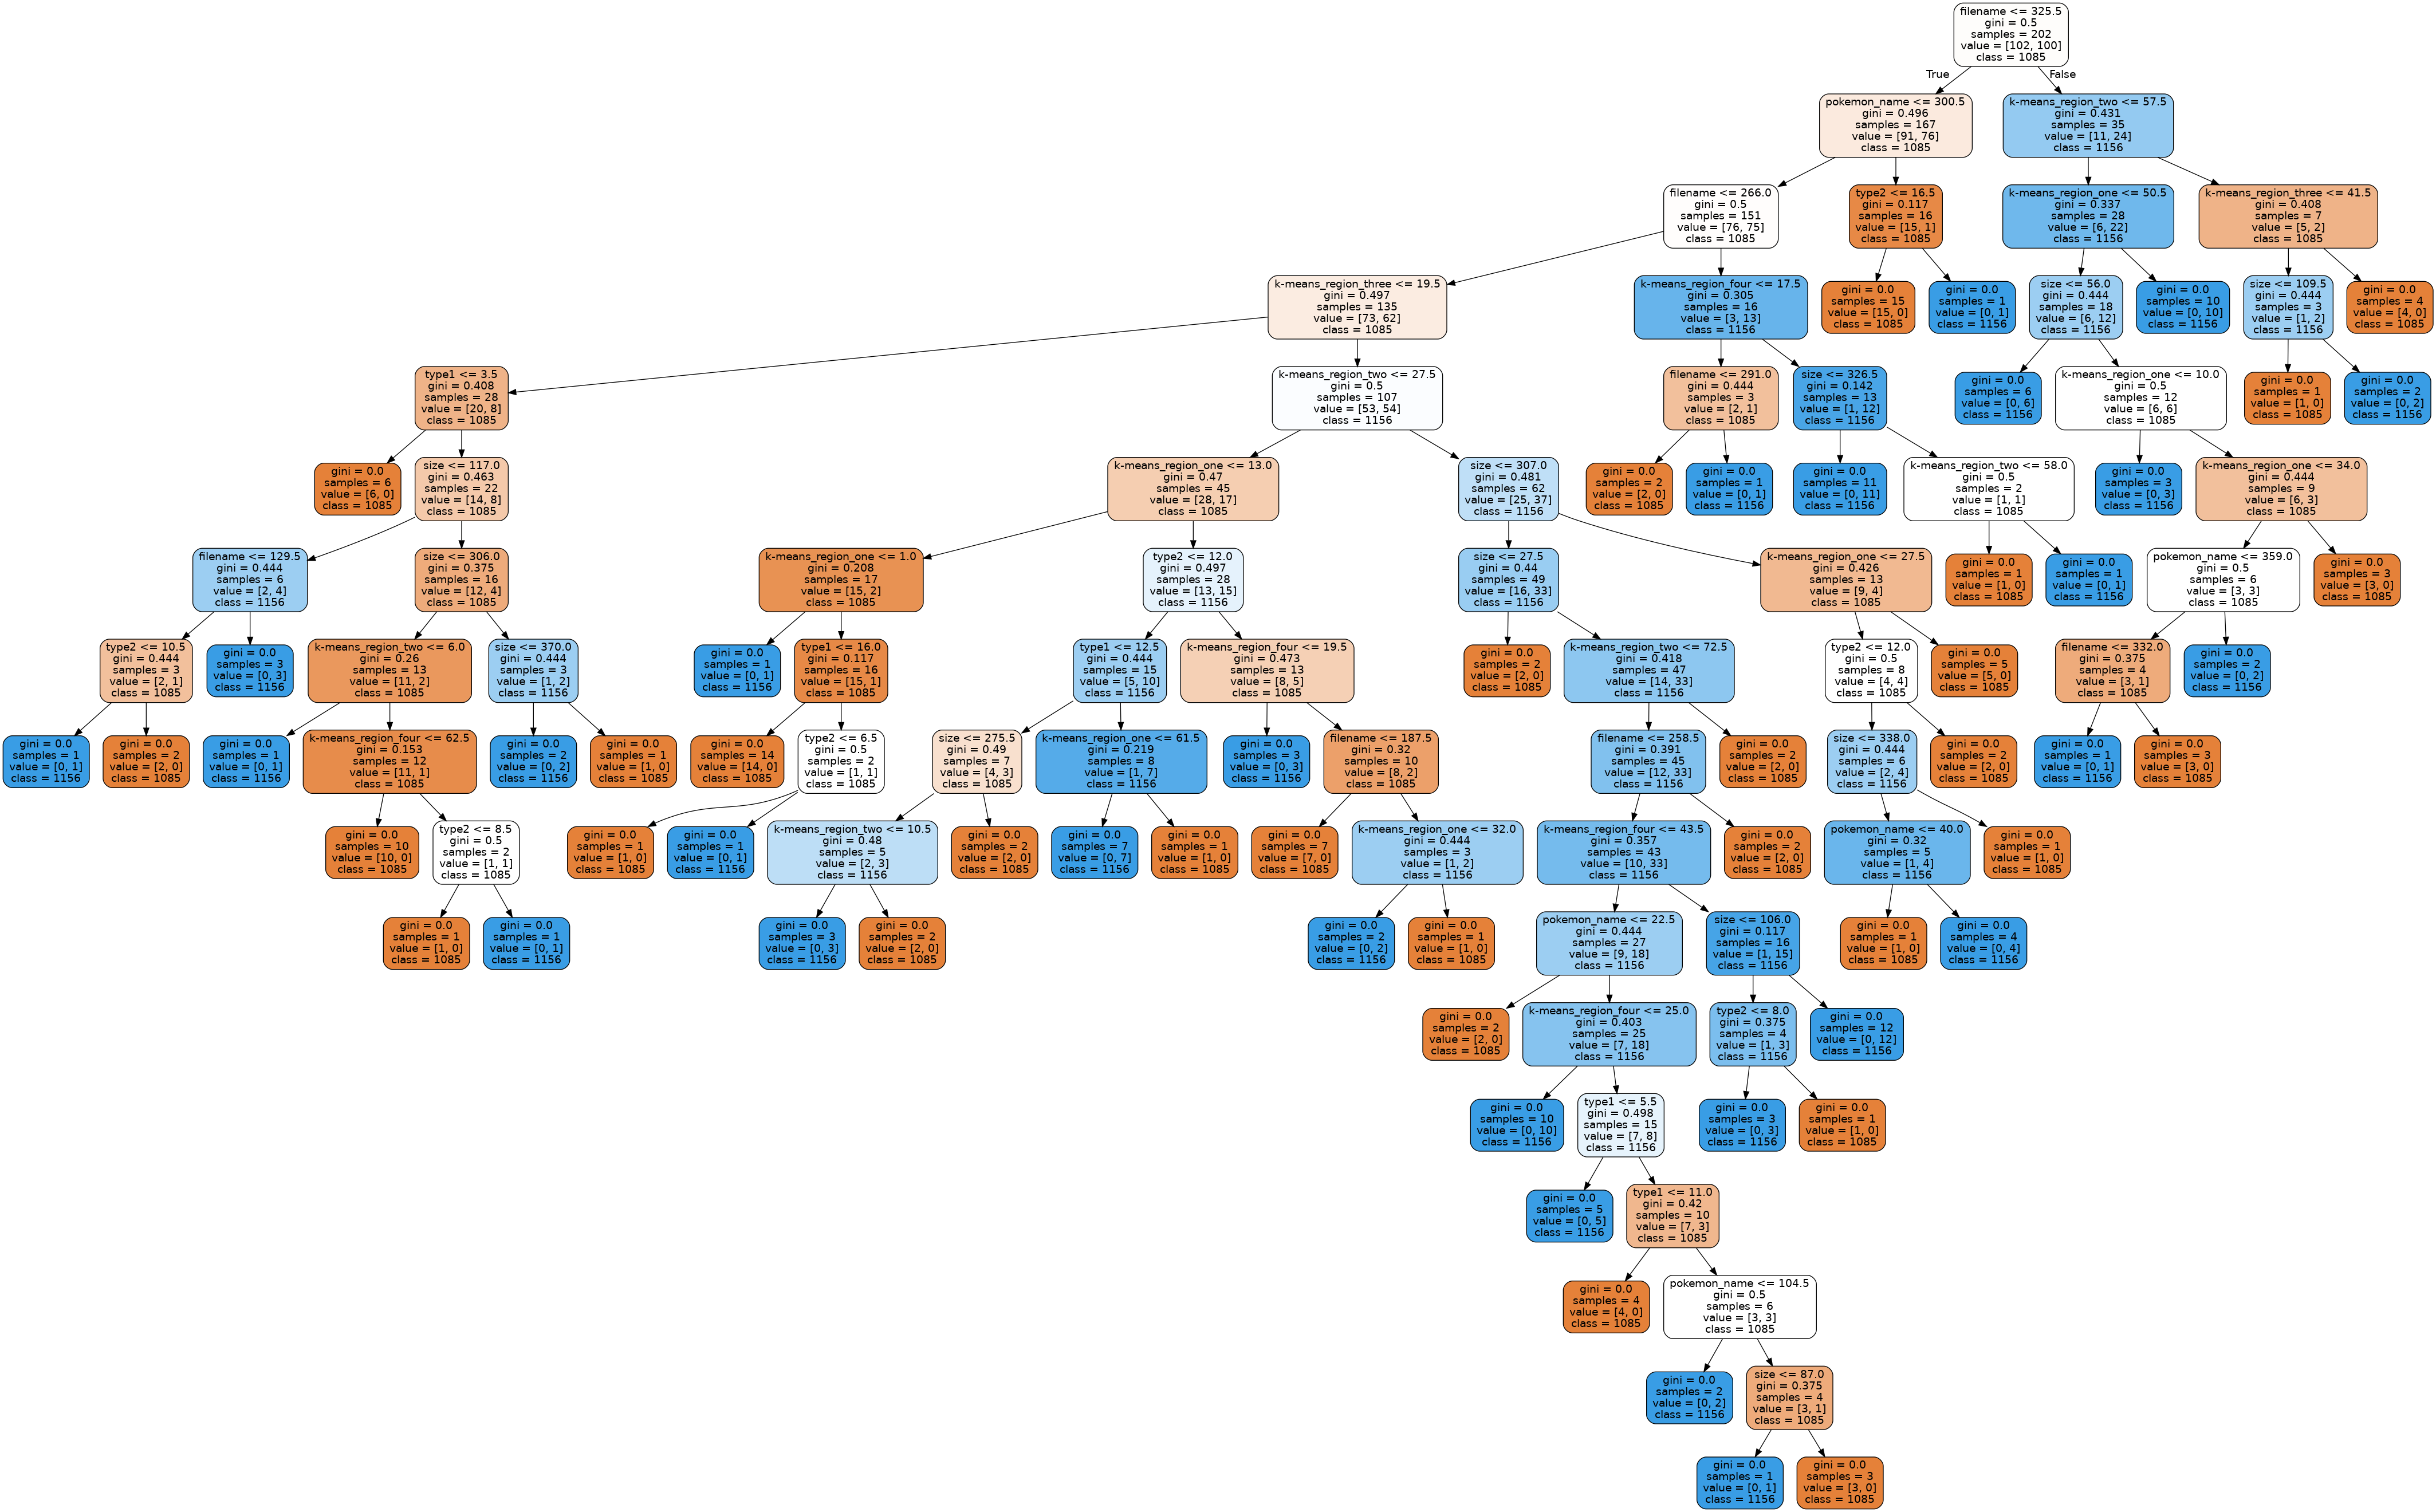

In [11]:
from sklearn import tree
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import graphviz
import pydotplus
from IPython.display import Image, display

with open('./images_info.json') as d:
    file_contents = d.read()
data = json.loads(file_contents)
datadict={}
resultdict={}

favorite_all=[
        "favorite_utilisateur2",
        "favorite_utilisateur3",
        "favorite_utilisateur4",
        ]

favorite=["favorite_utilisateur1"]
for keyi in data[0].keys(): 
    if keyi not in favorite_all:
        if keyi in favorite:
            resultdict[keyi]=[]
        else:
            datadict[keyi]=[]

for dicti in data:
    for keyi in dicti.keys():
        if keyi not in favorite_all:
            if keyi in favorite:
                resultdict[keyi].append(dicti[keyi])
            else:
                datadict[keyi].append(dicti[keyi])


#creating dataframes
dataframe = pd.DataFrame(datadict)
resultframe = pd.DataFrame(resultdict)

print(dataframe)
print(resultframe)

#generating numerical labels
le1 = LabelEncoder() #On associe un chiffre avec le texte du tag
dataframe['filename'] = le1.fit_transform(dataframe['filename'])

le2 = LabelEncoder()
dataframe['pokemon_name'] = le2.fit_transform(dataframe['pokemon_name'])

le3 = LabelEncoder()
dataframe['type1'] = le3.fit_transform(dataframe['type1'])

le4 = LabelEncoder()
dataframe['type2'] = le4.fit_transform(dataframe['type2'])

le5 = LabelEncoder() #On associe un chiffre avec le texte du tag
dataframe['size'] = le5.fit_transform(dataframe['size'])

le6 = LabelEncoder()
dataframe['k-means_region_one'] = le6.fit_transform(dataframe['k-means_region_one'])

le7 = LabelEncoder()
dataframe['k-means_region_two'] = le7.fit_transform(dataframe['k-means_region_two'])

le8 = LabelEncoder()
dataframe['k-means_region_three'] = le8.fit_transform(dataframe['k-means_region_three'])

le9 = LabelEncoder()
dataframe['k-means_region_four'] = le9.fit_transform(dataframe['k-means_region_four'])

le10 = LabelEncoder()
resultframe['favorite_utilisateur1'] = le10.fit_transform(resultframe['favorite_utilisateur1'])
"""
le9 = LabelEncoder()
resultframe['favorite_utilisateur2'] = le9.fit_transform(resultframe['favorite_utilisateur3'])

le10 = LabelEncoder()
resultframe['favorite_utilisateur3'] = le10.fit_transform(resultframe['favorite_utilisateur3'])

le11 = LabelEncoder()
resultframe['favorite_utilisateur4'] = le11.fit_transform(resultframe['favorite_utilisateur4'])
"""
#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe[:int(len(dataframe.index)/2)], resultframe[:int(len(resultframe.index)/2)])

dot_data = tree.export_graphviz(dtc, out_file=None,
      feature_names=dataframe.columns,
      filled=True, rounded=True, 
      class_names =
      le5.inverse_transform(
        resultframe.favorite_utilisateur1.unique())
     ) 
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(pydot_graph.create_png())
display(img)

In [12]:
# prediction
prediction = dtc.predict(dataframe[int(len(dataframe.index)/2):])
print(le10.inverse_transform(prediction))
print(dtc.feature_importances_)

['Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'

In [13]:
def predict_favorite(id):
    if le10.inverse_transform(dtc.predict(dataframe[id:id+1]))==['Yes']:
        return True
    return False


In [14]:
def recommend():
    recommendation_list=[]
    for id in range(1,len(dataframe.index)):
        if predict_favorite(id):
            recommendation_list.append(dataframe.loc[id]["filename"])
    return le1.inverse_transform(recommendation_list)

In [15]:
print("Acuracy: ", metrics.accuracy_score(resultframe[int(len(resultframe.index)/2):], prediction))
print("Recommendations pour l'utilisateur",recommend())

Acuracy:  0.541871921182266
Recommendations pour l'utilisateur ['venusaur.png' 'charizard.png' 'weedle.png' 'beedrill.png'
 'pidgeotto.png' 'nidoqueen.png' 'jigglypuff.png' 'zubat.png' 'gloom.png'
 'paras.png' 'parasect.png' 'venonat.png' 'weepinbell.png'
 'victreebel.png' 'tentacool.png' 'graveler.png' 'magnemite.png'
 'farfetchd.png' 'doduo.png' 'dodrio.png' 'dewgong.png' 'cloyster.png'
 'haunter.png' 'onix.png' 'rhyhorn.png' 'rhydon.png' 'starmie.png'
 'mr-mime.png' 'scyther.png' 'gyarados.png' 'omanyte.png' 'kabuto.png'
 'aerodactyl.png' 'ledyba.png' 'crobat.png' 'natu.png' 'marill.png'
 'hoppip.png' 'wooper.png' 'quagsire.png' 'steelix.png' 'qwilfish.png'
 'scizor.png' 'heracross.png' 'magcargo.png' 'swinub.png' 'delibird.png'
 'pupitar.png' 'lugia.png' 'combusken.png' 'marshtomp.png' 'dustox.png'
 'swellow.png' 'wingull.png' 'ralts.png' 'kirlia.png' 'surskit.png'
 'masquerain.png' 'nincada.png' 'ninjask.png' 'azurill.png' 'mawile.png'
 'aron.png' 'meditite.png' 'roselia.png' 'car

In [16]:
########### VISUALISATION DES DONNEES ##################

from prettytable import PrettyTable

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un tableau pour afficher les résultats
table = PrettyTable()
table.field_names = ['Nom du fichier', 'Nom du Pokemon', 'Type 1', 'Type 2']

# Présentation de tous les types de Pokemon 
list_types = ["Normal", "Fight", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel", "Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]

print("Voici tous les types de Pokemon :")
for tp in list_types :
    print(" - "+ tp)

# Demander à l'utilisateur de saisir un type de Pokemon
pokemon_type = input('Entrez un type de Pokemon : ')

# Parcourir les données pour trouver les fichiers correspondants au type de Pokemon

count = 0

for pokemon in data:
    if pokemon['type1'] == pokemon_type or pokemon['type2'] == pokemon_type:
        table.add_row([pokemon['filename'], pokemon['pokemon_name'], pokemon['type1'], pokemon['type2']])
        count+=1

# Afficher le tableau
print(table)
print("Il y a", count, "éléments possédant ce type.")

Voici tous les types de Pokemon :
 - Normal
 - Fight
 - Flying
 - Poison
 - Ground
 - Rock
 - Bug
 - Ghost
 - Steel
 - Fire
 - Water
 - Grass
 - Electric
 - Psychic
 - Ice
 - Dragon
 - Dark
 - Fairy


Entrez un type de Pokemon :  Ghost


+-----------------------+-------------------+----------+--------+
|     Nom du fichier    |   Nom du Pokemon  |  Type 1  | Type 2 |
+-----------------------+-------------------+----------+--------+
|       gastly.png      |       gastly      |  Ghost   | Poison |
|      haunter.png      |      haunter      |  Ghost   | Poison |
|       gengar.png      |       gengar      |  Ghost   | Poison |
|      shedinja.png     |      shedinja     |   Bug    | Ghost  |
|      sableye.png      |      sableye      |   Dark   | Ghost  |
|      drifloon.png     |      drifloon     |  Ghost   | Flying |
|      drifblim.png     |      drifblim     |  Ghost   | Flying |
|     spiritomb.png     |     spiritomb     |  Ghost   |  Dark  |
|      froslass.png     |      froslass     |   Ice    | Ghost  |
|       rotom.png       |       rotom       | Electric | Ghost  |
|  giratina-altered.png |  giratina-altered |  Ghost   | Dragon |
|      frillish.png     |      frillish     |  Water   | Ghost  |
|     jell

In [17]:
import json
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Récupérer les noms des champs de couleurs
color_columns = [col for col in data[0] if col.startswith('k-means_region_')]

# Créer une liste de tous les noms de couleurs valides
color_names = list(CSS3_HEX_TO_NAMES.values())

# Afficher les noms de couleurs disponibles à l'utilisateur
print("Les couleurs disponibles sont :")
for color_name in color_names:
    print(color_name)

# Demander à l'utilisateur de saisir une couleur
color_name = input("Entrez le nom d'une couleur : ")

# Vérifier si la couleur est valide
if color_name.lower() not in color_names:
    print(f"Erreur : la couleur '{color_name}' n'est pas valide.")
else:
    # Vérifier si la couleur est présente dans les colonnes du JSON
    matching_files = []
    for item in data:
        for col in color_columns:
            if color_name.lower() in item.get(col, '').lower():
                matching_files.append(item)
                break

    # Afficher les résultats sous forme de tableau
    
    count = 0
    
    if matching_files:
        table = PrettyTable()
        table.field_names = ["filename", "pokemon_name", "type1", "type2", "size", "k-means_region_one", "k-means_region_two", "k-means_region_three", "k-means_region_four"]
        for item in matching_files:
            table.add_row([item['filename'], item['pokemon_name'], item['type1'], item['type2'], item['size'], item['k-means_region_one'], item['k-means_region_two'], item['k-means_region_three'], item['k-means_region_four']])
            
            count += 1
        print(table)
        print("Il y a", count, "éléments possédant cette couleur.")
    else:
        print(f"Aucun fichier n'a la couleur {color_name}.")


Les couleurs disponibles sont :
aliceblue
antiquewhite
cyan
aquamarine
azure
beige
bisque
black
blanchedalmond
blue
blueviolet
brown
burlywood
cadetblue
chartreuse
chocolate
coral
cornflowerblue
cornsilk
crimson
darkblue
darkcyan
darkgoldenrod
darkgray
darkgreen
darkkhaki
darkmagenta
darkolivegreen
darkorange
darkorchid
darkred
darksalmon
darkseagreen
darkslateblue
darkslategray
darkturquoise
darkviolet
deeppink
deepskyblue
dimgray
dodgerblue
firebrick
floralwhite
forestgreen
magenta
gainsboro
ghostwhite
gold
goldenrod
gray
green
greenyellow
honeydew
hotpink
indianred
indigo
ivory
khaki
lavender
lavenderblush
lawngreen
lemonchiffon
lightblue
lightcoral
lightcyan
lightgoldenrodyellow
lightgray
lightgreen
lightpink
lightsalmon
lightseagreen
lightskyblue
lightslategray
lightsteelblue
lightyellow
lime
limegreen
linen
maroon
mediumaquamarine
mediumblue
mediumorchid
mediumpurple
mediumseagreen
mediumslateblue
mediumspringgreen
mediumturquoise
mediumvioletred
midnightblue
mintcream
mistyrose


Entrez le nom d'une couleur :  yellow


+----------------+--------------+---------+----------+------+--------------------+--------------------+----------------------+---------------------+
|    filename    | pokemon_name |  type1  |  type2   | size | k-means_region_one | k-means_region_two | k-means_region_three | k-means_region_four |
+----------------+--------------+---------+----------+------+--------------------+--------------------+----------------------+---------------------+
| butterfree.png |  butterfree  |   Bug   |  Flying  | 3982 |     whitesmoke     |    yellowgreen     |        tomato        |      slateblue      |
|  mr-mime.png   |   mr-mime    | Psychic |  Fairy   | 4029 |     gainsboro      |     indianred      |     yellowgreen      |      royalblue      |
|  gyarados.png  |   gyarados   |  Water  |  Flying  | 4797 |     lightgray      |     steelblue      |       deeppink       |     greenyellow     |
|   lapras.png   |    lapras    |  Water  |   Ice    | 3616 |    greenyellow     |      hotpink       |   

In [18]:
import json
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from prettytable import PrettyTable

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Récupérer les noms des champs de couleurs
color_columns = [col for col in data[0] if col.startswith('k-means_region_')]

# Créer une liste de tous les noms de couleurs valides
color_names = list(CSS3_HEX_TO_NAMES.values())

# Demander à l'utilisateur de saisir une couleur
color_name = input("Entrez le nom d'une couleur : ")

# Présentation de tous les types de Pokemon 
list_types = ["Normal", "Fight", "Flying", "Poison", "Ground", "Rock", "Bug", "Ghost", "Steel", "Fire", "Water", "Grass", "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]

print("Voici tous les types de Pokemon :")
for tp in list_types :
    print(" - "+ tp)

# Vérifier si la couleur est valide
if color_name.lower() not in color_names:
    print(f"Erreur : la couleur '{color_name}' n'est pas valide.")
else:
    # Demander à l'utilisateur de saisir un type de Pokemon
    pokemon_type = input('Entrez un type de Pokemon : ')

    # Créer un tableau pour afficher les résultats
    table = PrettyTable()
    table.field_names = ["filename", "pokemon_name", "type1", "type2", "size", "k-means_region_one", "k-means_region_two", "k-means_region_three", "k-means_region_four"]

    # Parcourir les données pour trouver les fichiers correspondants au type de Pokemon et à la couleur sélectionnée
    matching_files = []
    for item in data:
        if (color_name.lower() in item.get(color_columns[0], '').lower() or
            color_name.lower() in item.get(color_columns[1], '').lower() or
            color_name.lower() in item.get(color_columns[2], '').lower() or
            color_name.lower() in item.get(color_columns[3], '').lower()) and \
           (item['type1'] == pokemon_type or item['type2'] == pokemon_type):
            matching_files.append(item)
    
    #Compteur permettant de compter le nombre d'éléments possédant ce type et cette couleur
    count = 0
    
    # Afficher les résultats sous forme de tableau
    if matching_files:
        for item in matching_files:
            table.add_row([item['filename'], item['pokemon_name'], item['type1'], item['type2'], item['size'], item['k-means_region_one'], item['k-means_region_two'], item['k-means_region_three'], item['k-means_region_four']])
            count += 1
        print(table)
        print("Il y a", count,  "éléments possédant cette couleur et ce type.")
    else:
        print(f"Aucun fichier n'a la couleur {color_name} et le type de Pokemon {pokemon_type}.")


Entrez le nom d'une couleur :  yellow


Voici tous les types de Pokemon :
 - Normal
 - Fight
 - Flying
 - Poison
 - Ground
 - Rock
 - Bug
 - Ghost
 - Steel
 - Fire
 - Water
 - Grass
 - Electric
 - Psychic
 - Ice
 - Dragon
 - Dark
 - Fairy


Entrez un type de Pokemon :  poison


Aucun fichier n'a la couleur yellow et le type de Pokemon poison.


In [19]:
import json
import matplotlib.pyplot as plt

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un dictionnaire pour stocker le nombre de pokemons pour chaque type
pokemon_count = {}

# Parcourir les données pour compter le nombre de pokemons pour chaque type
for pokemon in data:
    pokemon_type = pokemon['type1']
    if pokemon_type in pokemon_count:
        pokemon_count[pokemon_type] += 1
    else:
        pokemon_count[pokemon_type] = 1

# Créer un histogramme pour visualiser la répartition des types de Pokémon
fig, ax = plt.subplots()
ax.bar(pokemon_count.keys(), pokemon_count.values())
ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')
ax.set_ylabel('Nombre de Pokémons')
ax.set_title('Répartition des types primaires de Pokémon')
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

<ipython-input-179-739d132929e6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')


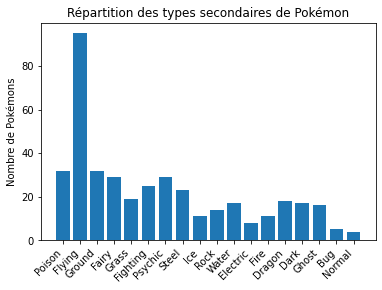

In [179]:
import json
import matplotlib.pyplot as plt

# Charger le fichier json contenant les informations sur les pokemons
with open('images_info.json', 'r') as f:
    data = json.load(f)

# Créer un dictionnaire pour stocker le nombre de pokemons pour chaque type
pokemon_count = {}

# Parcourir les données pour compter le nombre de pokemons pour chaque type
for pokemon in data:
    pokemon_type = pokemon['type2']
    if pokemon_type in pokemon_count:
        pokemon_count[pokemon_type] += 1
    else:
        pokemon_count[pokemon_type] = 1

# Créer un histogramme pour visualiser la répartition des types de Pokémon
fig, ax = plt.subplots()
ax.bar(pokemon_count.keys(), pokemon_count.values())
ax.set_xticklabels(pokemon_count.keys(), rotation=45, ha='right')
ax.set_ylabel('Nombre de Pokémons')
ax.set_title('Répartition des types secondaires de Pokémon')
plt.show()

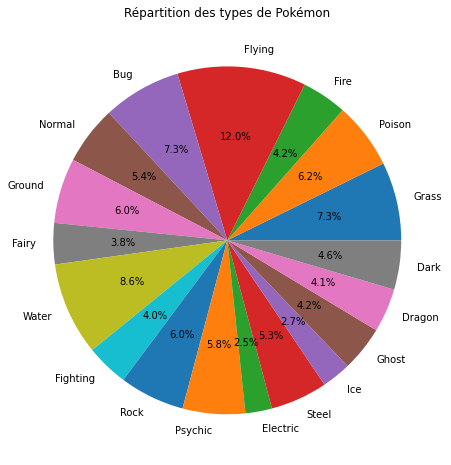

In [186]:
import matplotlib.pyplot as plt

# Compter le nombre de Pokémon de chaque type
pokemon_count = {}
for pokemon in data:
    type1 = pokemon['type1']
    type2 = pokemon['type2']
    if type1 in pokemon_count:
        pokemon_count[type1] += 1
    else:
        pokemon_count[type1] = 1
    if type2 and type2 != type1:
        if type2 in pokemon_count:
            pokemon_count[type2] += 1
        else:
            pokemon_count[type2] = 1

# Créer une figure de taille personnalisée
fig, ax = plt.subplots(figsize=(8, 8))

# Tracer le diagramme en secteurs
ax.pie(pokemon_count.values(), labels=pokemon_count.keys(), autopct='%1.1f%%')

# Ajouter un titre
ax.set_title('Répartition des types de Pokémon')

# Afficher le diagramme
plt.show()

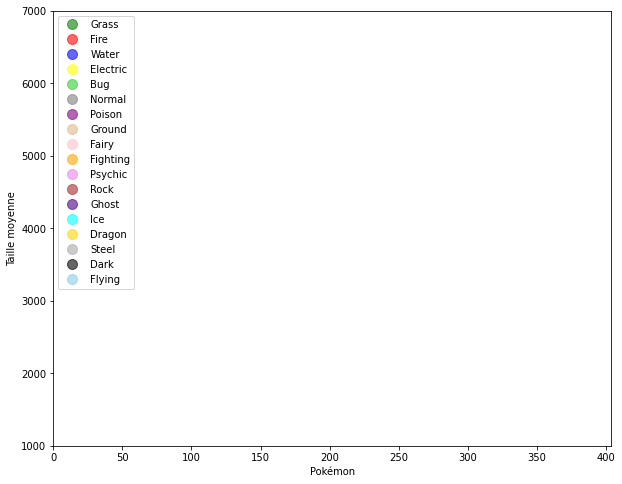

In [215]:
import matplotlib.pyplot as plt

with open('./images_info.json', 'r') as f:
    pokemon_data = json.load(f)

# Créer la figure
fig = plt.figure(figsize=(10, 8))

# Créer les axes
ax = fig.add_subplot(111)

# Définir la taille des cercles en fonction de la taille des Pokémon
sizes = [int(pokemon['size']) for pokemon in pokemon_data]
sizes = [size * 10 for size in sizes]

# Créer un dictionnaire pour stocker la taille moyenne de chaque type de Pokémon
type_sizes = {}
for pokemon in pokemon_data:
    for t in pokemon['type1']:
        if t not in type_sizes:
            type_sizes[t] = []
        type_sizes[t].append(int(pokemon['size']))

type_avg_size = {}
for t in type_sizes:
    type_avg_size[t] = sum(type_sizes[t]) / len(type_sizes[t])

# Créer la carte thermique
colors = {'Grass': 'green', 'Fire': 'red', 'Water': 'blue', 'Electric': 'yellow',
          'Bug': 'limegreen', 'Normal': 'gray', 'Poison': 'purple', 'Ground': 'burlywood',
          'Fairy': 'pink', 'Fighting': 'orange', 'Psychic': 'violet', 'Rock': 'brown',
          'Ghost': 'indigo', 'Ice': 'cyan', 'Dragon': 'gold', 'Steel': 'darkgray',
          'Dark': 'black', 'Flying': 'skyblue'}

for pokemon in pokemon_data:
    for t in pokemon['type1']:
        if t in colors:
            ax.scatter(pokemon['pokemon_name'], type_avg_size[t], s=sizes[i], c=colors[t], alpha=0.6)
            ax.annotate(pokemon['pokemon_name'], xy=(pokemon['pokemon_name'], type_avg_size[t]), ha='center', va='center', fontsize=8)


# Définir les étiquettes des axes
ax.set_xlabel('Pokémon')
ax.set_ylabel('Taille moyenne')

# Définir la palette de couleurs
plt.colormaps.get_cmap('rainbow')

# Définir les limites des axes
ax.set_xlim(0, 404)
ax.set_ylim(1000, 7000)

# Ajouter une légende
handles = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color, alpha=0.6)[0] for color in colors.values()]
labels = list(colors.keys())
ax.legend(handles, labels, loc='upper left')

# Afficher la figure
plt.show()